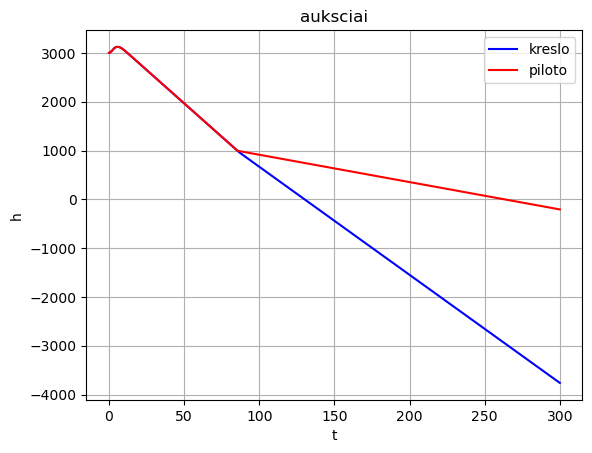

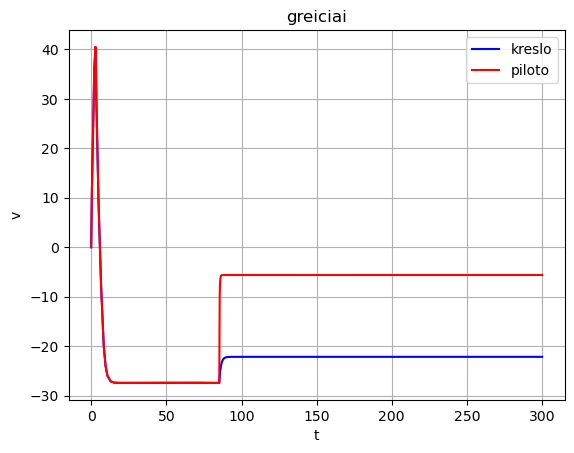

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as sc

def funk(t,X):  # PDL desines puses funkcija
  hk=X[0];hp=X[1];vk=X[2];vp=X[3]; # kreslo ir piloto auksciai ir greiciai
  mp=80;mk=150;kk=3;kp=25          # mases ir oro pasipriesinimo koeficientai
  F=8000;    # katapultos jega
  if t > 3: F=0            
  
  rez=np.zeros(4,dtype=float)

  if hk > 1000:   # iki parasiuto issiskleidimo
    rez[0]=vk;rez[1]=vp;
    rez[2]=-9.81+(F-kk*vk**2*np.sign(vk))/(mp+mk);
    rez[3]=rez[2];
  else:           # issikleidus parasiutui
    rez[0]=vk;rez[2]=-9.81-kk*vk**2*np.sign(vk)/mk
    rez[1]=vp; rez[3]=-9.81-kp*vp**2*np.sign(vp)/mp;
    
  return rez

ttt=300  # skaiciavimo laikas  (s)
tspan=np.array([0,ttt],dtype=float)
Y=sc.solve_ivp(funk, tspan, [3000,3000,0,0])
H=Y.y
T=Y.t
fig1=plt.figure(1); ax1=fig1.add_subplot(1,1,1); ax1.set_xlabel('t');ax1.set_ylabel('h');ax1.grid();plt.title('auksciai')
ax1.plot(T,H[0,:],'b-');ax1.plot(T,H[1,:],'r-'); plt.legend(['kreslo','piloto']);plt.show()

fig2=plt.figure(1); ax2=fig2.add_subplot(1,1,1); ax2.set_xlabel('t');ax2.set_ylabel('v');ax2.grid();plt.title('greiciai')
ax2.plot(T,H[2,:],'b-');ax2.plot(T,H[3,:],'r-');plt.legend(['kreslo','piloto']);plt.show();
